In [ ]:
import matplotlib.pyplot as plt
import numpy as np

In [19]:
# %matplotlib inline

### Basic figure

#### Plotting on a single axes object

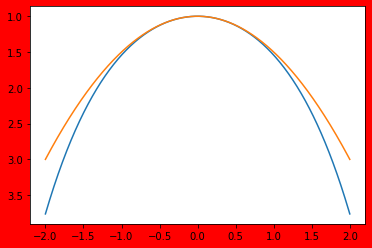

In [44]:
fig = plt.figure('Population density', facecolor='red')
ax = fig.add_subplot(111)

x = np.linspace(-2, 2, 1000)
line_cosh, = ax.plot(x, np.cosh(x))
line_quad, = ax.plot(x, 1 + x**2 / 2)
ax.invert_yaxis()

#### Plot limits 

(0.0, 43.4)

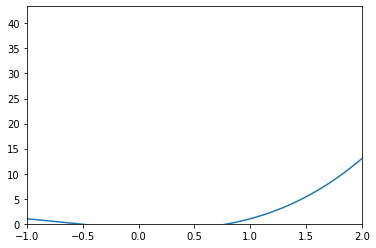

In [25]:
x = np.linspace(-3, 3, 1000)
y = x**3+2 * x**2-x-1
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(x, y)
ax.set_xlim(-1, 2)  # x-limits are -1 to 2
ax.set_ylim(bottom=0)  # ymin=0: plot will be "clipped" at the bottom

#### Line styles, markers and colors

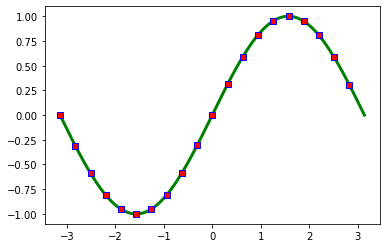

In [53]:
fig = plt.figure()
ax = fig.add_subplot(111)
x = np.linspace(-np.pi, np.pi, 1000)
line, = ax.plot(x, np.sin(x), lw=3, c='g', marker='s',
                markevery=50, mfc='r', mec='b')
# line.set_dashes([2, 4, 8, 4, 2, 4])
# represents a pattern of dot (2 pts), space (4 pts), dash (8 pts), space
# (4 pts), dot (2 pts), space (4 pts) to be repeated as the line style.

#### Scatterplots 

##### the correlation between birth rate, life expectancy and per capita income

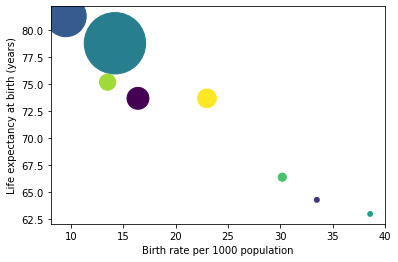

In [60]:
countries = ['Brazil', 'Madagascar', 'S. Korea', 'United States',
             'Ethiopia', 'Pakistan', 'China', 'Belize']
# Birth rate per 1000 population
birth_rate = [16.4, 33.5, 9.5, 14.2, 38.6, 30.2, 13.5, 23.0]
# Life expectancy at birth, years
life_expectancy = [73.7, 64.3, 81.3, 78.8, 63.0, 66.4, 75.2, 73.7]
# Per person income fixed to US Dollars in 2000
GDP = np.array([4800, 240, 16700, 37700, 230, 670, 2640, 3490])

fig = plt.figure()
ax = fig.add_subplot(111)
# Some arbitrary colors:
colors = range(len(countries))
ax.scatter(birth_rate, life_expectancy, c=colors, s=GDP/10)
ax.set_xlabel('Birth rate per 1000 population')
ax.set_ylabel('Life expectancy at birth (years)')
plt.show()

#### Gridlines, Log scales, Adding titles, labels and legends

In [ ]:
# log(− |x|) = − log(|x|), then use ’symlog’ instead of ’log’

##### The median age at frst marriage in the US over time

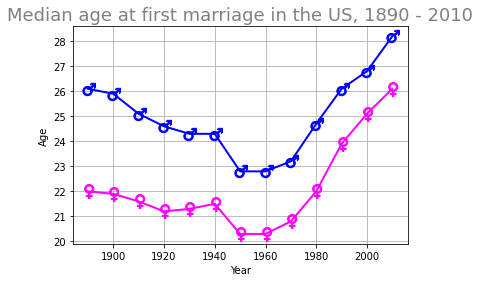

In [17]:
year, age_m, age_f = np.loadtxt(
    'eg7-marriage-ages.txt', unpack=True, skiprows=3)
fig = plt.figure()
ax = fig.add_subplot(111)

# Plot ages with male or female symbols as markers
ax.plot(year, age_m, marker='$\u2642$', markersize=14, c='blue', lw=2,
        mfc='blue', mec='blue')
ax.plot(year, age_f, marker='$\u2640$', markersize=14, c='magenta', lw=2,
        mfc='magenta', mec='magenta')
# ax.minorticks_on()
ax.grid(which='major')
ax.set_xlabel('Year')
ax.set_ylabel('Age')
ax.set_title('Median age at first marriage in the US, 1890 - 2010',
             fontsize=18, c='gray')

plt.show()

##### The populations of fve US cities over time

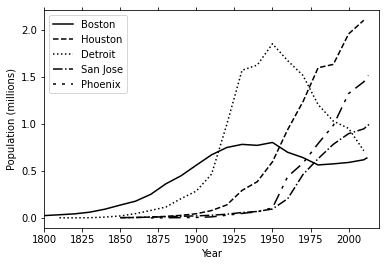

In [14]:
fig = plt.figure()
ax = fig.add_subplot(111)

cities = ['Boston', 'Houston', 'Detroit', 'San Jose', 'Phoenix']
# line styles: solid, dashes, dots, dash-dots, and dot-dot-dash
linestyles = [{'ls': '-'}, {'ls': '--'}, {'ls': ':'}, {'ls': '-.'},
              {'dashes': [2, 4, 2, 4, 8, 4]}]

for i, city in enumerate(cities):
    filename = '{}.tsv'.format(city.lower()).replace(' ', '_')
    yr, pop = np.loadtxt(filename, unpack=True)
    line, = ax.plot(yr, pop/1.e6, label=city, c='k', **linestyles[i])

ax.legend(loc='upper left')
ax.set_xlim(1800, 2020)
ax.set_xlabel('Year')
ax.set_ylabel('Population (millions)')
ax.xaxis.set_ticks_position('both')
plt.show()

#### Font properties, Tick marks

```python
from matplotlib import rc

font_properties = {'family' : 'monospace',
'weight' : 'bold',
'size' : 22}
rc('font', **font_properties)
```

##### Exponential decay illustrated in terms of lifetimes

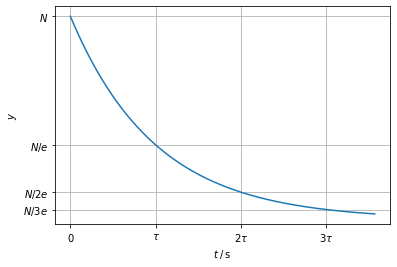

In [15]:
# Initial value of y at t=0, lifetime in s
N, tau = 10000, 28
# Maximum time to consider (s)
tmax = 100
# A suitable grid of time points, and the exponential decay itself
t = np.linspace(0, tmax, 1000)
y = N * np.exp(-t/tau)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(t, y)

# The number of lifetimes that fall within the plotted time interval
ntau = tmax // tau + 1
# xticks at 0, tau, 2*tau, ..., ntau*tau; yticks at the corresponding y-values
xticks = [i*tau for i in range(ntau)]
yticks = [N * np.exp(-i) for i in range(ntau)]
ax.set_xticks(xticks)
ax.set_yticks(yticks)
# xtick labels: 0, tau, 2tau, ...
xtick_labels = [r'$0$', r'$\tau$'] + \
    [r'${}\tau$'.format(k) for k in range(2, ntau)]
ax.set_xticklabels(xtick_labels)
# corresponding ytick labels: N, N/e, N/2e, ...
ytick_labels = [r'$N$', r'$N/e$'] + \
    [r'$N/{}e$'.format(k) for k in range(2, ntau)]
ax.set_yticklabels(ytick_labels)
ax.set_xlabel(r'$t\;/\,\mathrm{s}$')
ax.set_ylabel(r'$y$')
ax.grid()

plt.show()

##### Customized tick marks

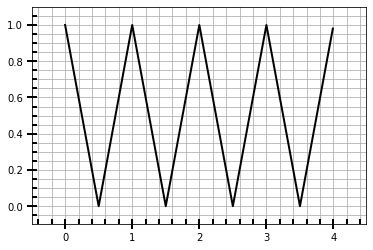

In [20]:
# A selection of functions on rn abcissa points for 0 <= x < 1
rn = 100
rx = np.linspace(0, 1, rn, endpoint=False)


def tophat(rx):
#     Top hat function: y = 1 for x < 0.5, y=0 for x >= 0.5
    ry = np.ones(rn)
    ry[rx >= 0.5] = 0
    return ry


# A dictionary of functions to choose from
ry = {'half-sawtooth': lambda rx: rx.copy(),
      'top-hat': tophat,
      'sawtooth': lambda rx: 2 * np.abs(rx-0.5)}
# Repeat the chosen function nrep times
nrep = 4
x = np.linspace(0, nrep, nrep*rn, endpoint=False)
y = np.tile(ry['sawtooth'](rx), nrep)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(x, y, 'k', lw=2)

# Add a bit of padding around the plotted line to aid visualization
ax.set_ylim(-0.1, 1.1)
ax.set_xlim(x[0]-0.5, x[-1]+0.5)

# Customize the tick marks and turn the grid on
ax.minorticks_on()
ax.tick_params(which='major', length=10, width=2, direction='inout')
ax.tick_params(which='minor', length=5, width=2, direction='in')
ax.grid(which='both')
plt.show()

#### Error bars

```python
# Some data
x = np.array([ 0.3, 0.5, 0.7, 0.9])
y = np.array([ 1. , 2. , 2.5, 3.9])
# Constant, symmetric errors of +/- 0.05 on x-data
xerr = 0.05
# Asymmetric, variable errors on y-data
yerr = np.array([[ 0.1 , 0.25, 0.5 , 0.4 ],
[ 0.1 , 0.15, 0.2 , 0. ]])
ax.errorbar(x, y, yerr, xerr, fmt='o', ls='')
```

##### Wing loading variation in swifts prior to fedging

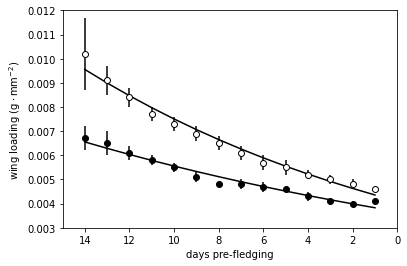

In [25]:
# Read in the data: day before fledging, wing loading and error for two broods
dt = [('day', 'i2'), ('wl1', 'f8'), ('wl1-err', 'f8'),
               ('wl2', 'f8'), ('wl2-err', 'f8')]
# dt = np.dtype([('day', 'i2'), ('wl1', 'f8'), ('wl1-err', 'f8'),
#                ('wl2', 'f8'), ('wl2-err', 'f8')])
data = np.loadtxt('fledging-data.csv', dtype=dt, delimiter=',')

# Weighted fit of exponential decay to the data. This is a linear least-squares
# problem because y = Aexp(-Bx) => ln y = ln A - Bx = mx + c
p1_fit = np.poly1d(np.polyfit(data['day'], np.log(data['wl1']), 1,
                              w=np.log(data['wl1'])**-2))
p2_fit = np.poly1d(np.polyfit(data['day'], np.log(data['wl2']), 1,
                              w=np.log(data['wl2'])**-2))

# print(p1_fit)

wl1fit = np.exp(p1_fit(data['day']))
wl2fit = np.exp(p2_fit(data['day']))

# Plot the data points with their uncertainties and the fits
fig = plt.figure()
ax = fig.add_subplot(111)

# wl1 data: white circles, black borders, with error bars
ax.errorbar(data['day'], data['wl1'], yerr=data['wl1-err'], ls='', marker='o',
            color='k', mfc='w', mec='k')
ax.plot(data['day'], wl1fit, 'k', lw=1.5)

# wl2 data: black filled circles, with error bars
ax.errorbar(data['day'], data['wl2'], yerr=data['wl2-err'], ls='', marker='o',
            color='k', mfc='k', mec='k')
ax.plot(data['day'], wl2fit, 'k', lw=1.5)

ax.set_xlim(15, 0)
ax.set_ylim(0.003, 0.012)
ax.set_xlabel('days pre-fledging')
ax.set_ylabel(r'wing loading ($\mathrm{g\cdot mm^{-2}}$)')
plt.show()

### Bar charts and pie charts

#### Bar charts and histograms

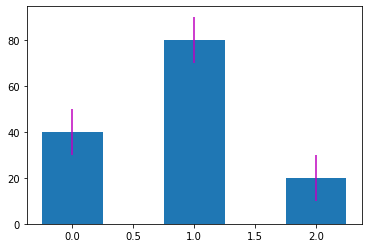

In [68]:
fig = plt.figure()
ax = fig.add_subplot(111)
w = 0.5
x, y = np.array([0, 1, 2]), np.array([40, 80, 20])
# ax.barh(x, y, w, align='center') # easiest way of centering the bars
ax.bar(x - w/2, y, w, align='edge', yerr=10, ecolor='m') # or calculate the left edges
plt.show()

##### Letter frequencies in the text of Moby-Dick

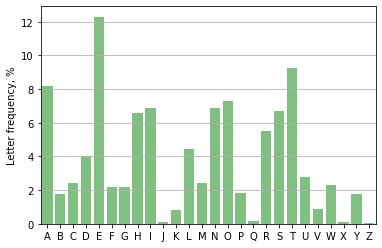

In [75]:
text_file = 'moby-dick.txt'

letters = 'ABCDEFGHIJKLMNOPQRSTUVWXYZ'
# Initialize the dictionary of letter counts: {'A': 0, 'B': 0, ...}
lcount = dict([(l, 0) for l in letters])

# Read in the text and count the letter occurences
for l in open(text_file).read():
    try:
        lcount[l.upper()] += 1
    except KeyError:
        # Ignore characters that are not letters
        pass
# The total number of letters
norm = sum(lcount.values())

fig = plt.figure()
ax = fig.add_subplot(111)
# The bar chart, with letters along the horizontal axis and the calculated
# letter frequencies as percentages as the bar height
x = range(26)
ax.bar(x, [lcount[l]/norm * 100 for l in letters], width=0.8,
       color='g', alpha=0.5, align='center')
# alpha represents how "thick" the color of those bars are.
ax.set_xticks(x)
ax.set_xticklabels(letters)
ax.tick_params(axis='x', direction='out')
ax.set_xlim(-0.5, 25.5)
ax.yaxis.grid(True)
ax.set_ylabel('Letter frequency, %')
plt.show()

##### Visualizing renewable electricity generation in Germany

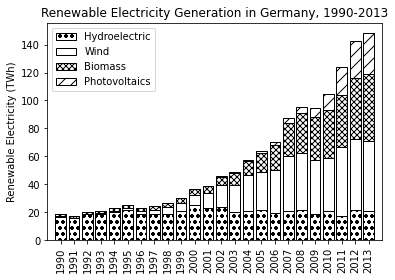

In [7]:
data = np.loadtxt('germany-energy-sources.txt', skiprows=2, dtype='f8')
years = data[:, 0]
n = len(years)

# GWh to TWh
data[:, 1:] /= 1000

fig = plt.figure()
ax = fig.add_subplot(111)
sources = ('Hydroelectric', 'Wind', 'Biomass', 'Photovoltaics')
hatch = ['oo', '', 'xxxx', '//']
bottom = np.zeros(n)
bars = [None]*n
for i, source in enumerate(sources):
    bars[i] = ax.bar(years, bottom=bottom, height=data[:, i+1], color='w',
                     hatch=hatch[i], align='center', edgecolor='k')
    bottom += data[:, i+1]

ax.set_xticks(years)

# rotate the label along the x-axis
plt.xticks(rotation=90)

ax.set_xlim(1989, 2014)
ax.set_ylabel('Renewable Electricity (TWh)')
ax.set_title('Renewable Electricity Generation in Germany, 1990-2013')
plt.legend(bars, sources, loc='best')
plt.show()

#### Pie charts

##### Pie chart of greenhouse gas emissions

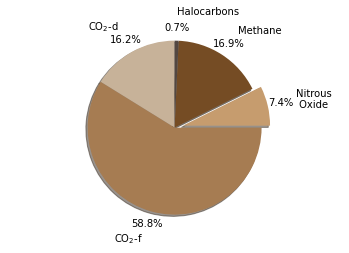

In [43]:
# Annual greenhouse gas emissions, billion tons carbon equivalent (GtCe)
gas_emissions = np.array([(r'$\mathrm{CO_2}$-d', 2.2),
                          (r'$\mathrm{CO_2}$-f', 8.0),
                          ('Nitrous\n Oxide', 1.0),
                          ('Methane', 2.3),
                          ('Halocarbons', 0.1)],
                         dtype=[('source', 'U17'), ('emission', 'f4')])

# 5 colours beige
colours = ['#C7B299', '#A67C52', '#C69C6E', '#754C24', '#534741']

explode = [0, 0, 0.1, 0, 0]

fig, ax = plt.subplots()
# This utility wrapper makes it convenient to create common layouts of
# subplots, including the enclosing figure object, in a single call.
ax.axis('equal')        # (So our pie looks round!) not necessary!
ax.pie(gas_emissions['emission'], colors=colours, shadow=True, startangle=90,
       explode=explode, labels=gas_emissions['source'], autopct='%.1f%%',
       pctdistance=1.15, labeldistance=1.33)

plt.show()

### Multiple subplots

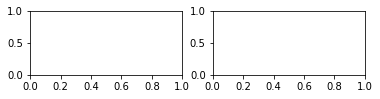

In [46]:
fig = plt.figure()
ax1 = fig.add_subplot(321)
ax2 = fig.add_subplot(322)

(3, 2)


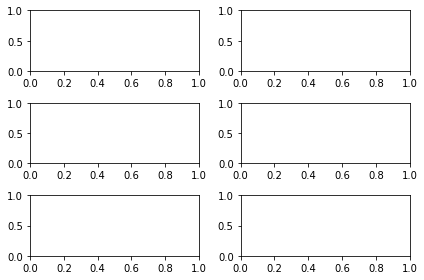

In [56]:
fig, axes = plt.subplots(nrows=3, ncols=2)
print(axes.shape)
ax1 = axes[0, 0]
ax2 = axes[0, 1]
fig.tight_layout()

##### The one-dimensional diffusion equation applied to the temperature of two different metal bars

(296.1217173008038, 381.44393668311983) (291.6198730442708, 475.9826660703137)
(298.7729564260953, 325.76791505199964) (297.3434691800467, 355.787147219019)
(299.6411798769103, 308.14755232319357) (299.1597253051225, 317.6457685930114)


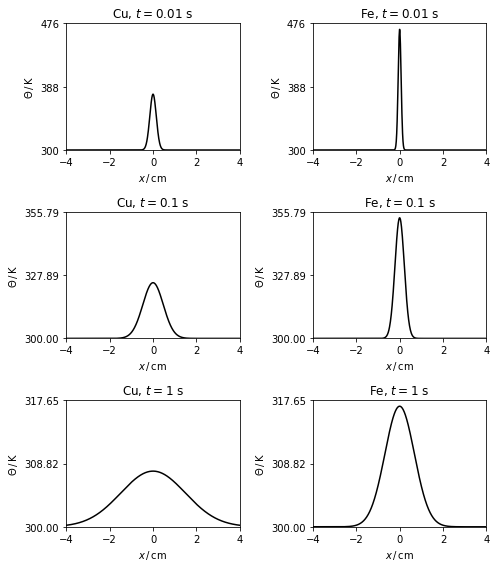

In [69]:
# Cross sectional area of bar in m3, heat added at x=0 in J
A, H = 1.e-4, 1.e3
# Temperature in K at t=0
theta0 = 300

# Metal element symbol, specific heat capacities per unit volume (J.m-3.K-1),
# Thermal diffusivities (m2.s-1) for Cu and Fe
metals = np.array([('Cu', 3.45e7, 1.11e-4), ('Fe', 3.50e7, 2.3e-5)],
                  dtype=[('symbol', 'U2'), ('cp', 'f8'), ('D', 'f8')])

# The metal bar extends from -xlim to xlim (m)
xlim, nx = 0.05, 1000
x = np.linspace(-xlim, xlim, nx)

# Calculate the temperature distribution at these three times
times = (1e-2, 0.1, 1)
# Create our subplots: three rows of times, one column for each metal
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(7, 8))
for j, t in enumerate(times):
    for i, metal in enumerate(metals):
        symbol, cp, D = metal
        ax = axes[j, i]
        # The solution to the diffusion equation
        theta = theta0 + H/cp/A/np.sqrt(D*t * 4*np.pi) * np.exp(-x**2/4/D/t)
        # Plot, converting distances to cm and add some labelling
        ax.plot(x*100, theta, 'k')
        ax.set_title('{}, $t={}$ s'.format(symbol, t))
        ax.set_xlim(-4, 4)
        ax.set_xlabel(r'$x\,/\,\mathrm{cm}$')
        ax.set_ylabel(r'$\Theta\,/\,\mathrm{K}$')

# Set up the y axis so that each metal has the same scale at the same t
for j in (0,1,2):
    ymax = max(axes[j,0].get_ylim()[1], axes[j,1].get_ylim()[1])
    print(axes[j,0].get_ylim(), axes[j,1].get_ylim())
    for i in (0,1):
        ax = axes[j,i]
        ax.set_ylim(theta0, ymax)
        # Ensure there are only three y-tick marks
        ax.set_yticks([theta0, (ymax + theta0)/2, ymax])
# We don't want the subplots to bash into each other: tight_layout() fixes this
fig.tight_layout()
plt.show()

##### Ten subplots with zero vertical spacing

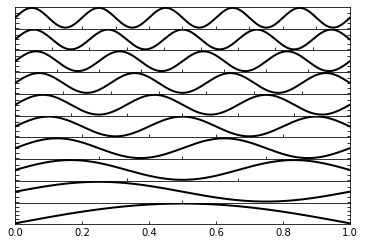

In [86]:
nrows = 10
fig, axes = plt.subplots(nrows,1)
# Zero vertical space between subplots
fig.subplots_adjust(hspace=0)

x = np.linspace(0,1,1000)
for i in range(nrows):
    # n=nrows for the top subplot, n=0 for the bottom subplot
    n = nrows - i
    axes[i].plot(x, np.sin(n * np.pi * x), 'k', lw=2)
    # We only want ticks on the bottom of each subplot
    axes[i].xaxis.set_ticks_position('bottom')
    axes[i].yaxis.set_ticks_position('both')
    axes[i].tick_params(which='major', direction='in')
    axes[i].set_xlim(0,1)
    axes[i].set_yticks(np.arange(0,1,1/5))
    
    if i < nrows-1:
        # Set ticks at the nodes (zeros) of our sine functions
        axes[i].set_xticks(np.arange(0, 1, 1/n))
        # We only want labels on the bottom subplot xaxis
        axes[i].set_xticklabels('')
        # Except the subplot of the very bottom, every subplot ranges from 0 to 1
        axes[i].set_yticks(np.arange(-1,1,1/2))
        
    axes[i].set_yticklabels('')
plt.show()

### Annotations

#### Adding text, Arrows and text

In `matplotlib_2.ipynb`